<a href="https://colab.research.google.com/github/devtico/geochemistry-insights/blob/master/Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>ROCHA</h1>

#Importações, troca de diretório e carregamento de banco

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/prosp_geoq

/content/gdrive/My Drive/prosp_geoq


In [ ]:
import perso
import pandas as pd
import matplotlib.pyplot as plt
import stat
import numpy as np
import altair as alt
!pip install geostatspy
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
!pip install pyproj
import pyproj
import scipy
from sklearn.preprocessing import scale
!pip install plotly==4.3.0
import plotly.express as px

In [ ]:
rocha = pd.read_excel('Lavras do Sul.xlsx', sheet_name= 2)

Ajusta display de linhas

In [ ]:
pd.options.display.max_rows =1000

#Análise exploratória

Visualização preliminar

In [ ]:
rocha.head()

,OBJECTID,id_amostra,amostra,numero_campo,base_cartografica,id_classe_amostra,classe_amostra,tipo_amostra,material_coletado,fonte_amostra,situacao_amostra,grau_intemperismo,mineral_minerio,tipo_vegetacao,area_drenagem,tipo_solo,pluviosidade,horizonte_solo,profundidade_rio,metodo,abertura,unidade,ag,al,bi,b,cao,ca,cd,ce,co,cr,fe,la,mg,mn,mo,nb,ni,pb,sc,sr,ti,y,zn,arsenio,au,ba,be,cu,sn,w,v,DATUM,POINT_X,POINT_Y
0,145406,253936,JAD319,RH0146,SH-22-Y-A-IV-3,9,Rocha,Simples,Rocha vulcÃ¢nica,Afloramento,Leito ativo abaixo do nível d'agua,Parcialmente decomposta ou oxidada,NaN,Terras cultivadas,NaN,NaN,Chuvas esparsas,NaN,0,Espectroscopia de absorção atômica,HNO3 a quente,ppm,Interferência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,00",NaN,NaN,NaN,NaN,"40,00",NaN,NaN,NaN,NaN,"5,00",NaN,NaN,NaN,SIRGAS 2000,-53.912778,-30.875833
1,145407,253936,JAD319,RH0146,SH-22-Y-A-IV-3,9,Rocha,Simples,Rocha vulcÃ¢nica,Afloramento,Leito ativo abaixo do nível d'agua,Parcialmente decomposta ou oxidada,NaN,Terras cultivadas,NaN,NaN,Chuvas esparsas,NaN,0,Espectrometria Ótica de emissão,Semiquantitativa,ppm,Não detectado,NaN,Não detectado,"10,00",NaN,NaN,Não detectado,NaN,"150,00",">5000,00",NaN,Não detectado,NaN,"1500,00",Não detectado,"<10,00","700,00","<10,00","30,00",Não detectado,NaN,Não detectado,Não detectado,Não detectado,Não detectado,"150,00",Não detectado,"10,00",Não detectado,Não detectado,"50,00",SIRGAS 2000,-53.912778,-30.875833
2,145408,253936,JAD319,RH0146,SH-22-Y-A-IV-3,9,Rocha,Simples,Rocha vulcÃ¢nica,Afloramento,Leito ativo abaixo do nível d'agua,Parcialmente decomposta ou oxidada,NaN,Terras cultivadas,NaN,NaN,Chuvas esparsas,NaN,0,Espectrometria Ótica de emissão,Semiquantitativa,%,NaN,NaN,NaN,NaN,NaN,"0,50",NaN,NaN,NaN,NaN,"10,00",NaN,">10,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,02",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIRGAS 2000,-53.912778,-30.875833
3,145409,253942,JAD325,RH0152,SH-22-Y-A-IV-3,9,Rocha,Simples,Dunito,Afloramento,NaN,Fresca ou não oxidada,NaN,Terras cultivadas,NaN,NaN,Chuvas esparsas,NaN,0,Espectroscopia de absorção atômica,HNO3 a quente,ppm,Interferência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,00",NaN,NaN,NaN,NaN,"25,00",NaN,NaN,NaN,NaN,"25,00",NaN,NaN,NaN,SIRGAS 2000,-53.934444,-30.888333
4,145410,253942,JAD325,RH0152,SH-22-Y-A-IV-3,9,Rocha,Simples,Dunito,Afloramento,NaN,Fresca ou não oxidada,NaN,Terras cultivadas,NaN,NaN,Chuvas esparsas,NaN,0,Espectrometria Ótica de emissão,Semiquantitativa,ppm,Não detectado,NaN,Não detectado,"10,00",NaN,NaN,Não detectado,NaN,"100,00",">5000,00",NaN,Não detectado,NaN,"1000,00",Não detectado,"<10,00","1500,00","<10,00","20,00",Não detectado,NaN,Não detectado,Não detectado,Não detectado,Não detectado,Não detectado,Não detectado,"30,00",Não detectado,Não detectado,"30,00",SIRGAS 2000,-53.934444,-30.888333


Verifica tipos de dados

In [ ]:
rocha.dtypes

OBJECTID               int64
id_amostra             int64
amostra               object
numero_campo          object
base_cartografica     object
id_classe_amostra      int64
classe_amostra        object
tipo_amostra          object
material_coletado     object
fonte_amostra         object
situacao_amostra      object
grau_intemperismo     object
mineral_minerio      float64
tipo_vegetacao        object
area_drenagem        float64
tipo_solo            float64
pluviosidade          object
horizonte_solo       float64
profundidade_rio       int64
metodo                object
abertura              object
unidade               object
ag                    object
al                   float64
bi                    object
b                     object
cao                  float64
ca                    object
cd                    object
ce                   float64
co                    object
cr                    object
fe                    object
la                    object
mg            

Remove caracteres especiais

In [ ]:
rocha = rocha.replace(['Não detectado', np.nan])
rocha = rocha.replace(',', '.', regex=True)
rocha = rocha.replace('<', '', regex=True)
rocha = rocha.replace('>', '', regex=True)
rocha = rocha.replace(['Interferência', np.nan])

Pegando somente colunas necessárias

In [ ]:
l = rocha.columns.to_list()
print(l)

['OBJECTID', 'id_amostra', 'amostra', 'numero_campo', 'base_cartografica', 'id_classe_amostra', 'classe_amostra', 'tipo_amostra', 'material_coletado', 'fonte_amostra', 'situacao_amostra', 'grau_intemperismo', 'mineral_minerio', 'tipo_vegetacao', 'area_drenagem', 'tipo_solo', 'pluviosidade', 'horizonte_solo', 'profundidade_rio', 'metodo', 'abertura', 'unidade', 'ag', 'al', 'bi', 'b', 'cao', 'ca', 'cd', 'ce', 'co', 'cr', 'fe', 'la', 'mg', 'mn', 'mo', 'nb', 'ni', 'pb', 'sc', 'sr', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'v', 'DATUM', 'POINT_X', 'POINT_Y']


In [ ]:
col_uteis = ['OBJECTID', 'POINT_X', 'POINT_Y','ag', 'al', 'bi', 'b', 'cao', 'ca', 'cd', 'ce', 'co', 'cr', 'fe', 'la', 'mg', 'mn', 'mo', 'nb', 'ni', 'pb', 'sc', 'sr', 'ti', 'y', 'zn', 'arsenio', 'au', 'ba', 'be', 'cu', 'sn', 'w', 'v']

In [ ]:
variaveis = col_uteis[3:]

In [ ]:
bd = rocha[col_uteis]

Converte tipos de dados

In [ ]:
bd.replace('Interferência', np.nan, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
bd[variaveis] = bd[variaveis].astype(float) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Verifica todas as unidades de medidas presentes no banco

In [ ]:
perso.montSet(rocha['unidade'])

{'%', 'ppm'}

Verifica se todas as variaveis possuem mais de uma unidade de medida

In [ ]:
var = []
unil = []
for v in col_uteis[3:]:
  fati = rocha.loc[:, ['unidade', v]]
  uni = perso.montSet(rocha.unidade)
  var.append(v)
  unil.append(uni)
dfuni = pd.DataFrame(var)
dfuni['uni'] = unil
dfuni

,0,uni
0,ag,"{ppm, %}"
1,al,"{ppm, %}"
2,bi,"{ppm, %}"
3,b,"{ppm, %}"
4,cao,"{ppm, %}"
5,ca,"{ppm, %}"
6,cd,"{ppm, %}"
7,ce,"{ppm, %}"
8,co,"{ppm, %}"
9,cr,"{ppm, %}"


*Todas as variáveis possuem 2 unidades de medidas diferentes*

Obtendo nova escala:

In [ ]:
bd[variaveis] = scale(bd[variaveis])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:157: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:165: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:182: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:189: UserWarning:

Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launch

''

Converte coordenadas

In [ ]:
source = pyproj.Proj(proj='latlong', datum='WGS84')
target = pyproj.Proj(proj='utm', zone=22, datum='WGS84')
point_x = bd.POINT_X.to_list()
point_y = bd.POINT_Y.to_list()
x, y = pyproj.transform(source, target, point_x, point_y)
bd['POINT_X'] = x
bd['POINT_Y'] = y 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Univariada

Sumário estatístico

In [ ]:
suma = perso.sumaEst(bd)

In [ ]:
suma

,OBJECTID,POINT_X,POINT_Y,ag,al,bi,b,cao,ca,cd,ce,co,cr,fe,la,mg,mn,mo,nb,ni,pb,sc,sr,ti,y,zn,arsenio,au,ba,be,cu,sn,w,v
contagem,143.000,143.000,143.000,115.000,0.000,0.000,142.000,0.000,141.000,0.000,0.000,142.000,142.000,141.000,115.000,141.000,142.000,73.000,142.000,142.000,143.000,142.000,115.000,141.000,115.000,143.000,50.000,51.000,142.000,136.000,143.000,5.000,0.000,142.000
média,360065.336,222552.584,-3415103.477,0.000,nan,nan,-0.000,nan,0.000,nan,nan,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,nan,0.000
variância,72789965715.563,74519333.566,192132033.801,0.000,nan,nan,1.007,nan,1.007,nan,nan,1.007,1.007,1.007,1.009,1.007,1.007,0.000,1.007,1.007,1.007,1.007,1.009,1.007,1.009,1.007,0.000,1.020,1.007,1.007,1.007,0.000,nan,1.007
desvio padrão,269796.156,8632.458,13861.170,0.000,nan,nan,1.004,nan,1.004,nan,nan,1.004,1.004,1.004,1.004,1.004,1.004,0.000,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,0.000,1.010,1.004,1.004,1.004,0.000,nan,1.004
coeficiente de variação,0.749,0.039,-0.004,nan,nan,nan,-55806513951166256.000,nan,27973504358346212.000,nan,nan,-28248689317784276.000,-9301085658527698.000,212423798721191520.000,13688961838055268.000,4755756687787866.000,-10351208232877602.000,nan,-7732227836607370.000,-91682130062630128.000,-19008188997470392.000,49367300802954720.000,inf,65361168837289680.000,-9288938390108910.000,-8180739568531565.000,nan,10085610697951000.000,-11259208955059844.000,-3626866334709960.000,8339076463406372.000,nan,nan,14585793419054812.000
mínimo,145406.000,214161.621,-3424960.455,0.000,nan,nan,-0.430,nan,-0.591,nan,nan,-2.593,-2.650,-1.907,-1.619,-2.620,-1.634,0.000,-0.147,-0.889,-1.033,-1.096,-0.592,-0.463,-2.369,-0.635,0.000,-0.524,-0.414,-0.400,-0.530,0.000,nan,-1.048
q1,149076.500,217019.886,-3421610.516,0.000,nan,nan,-0.430,nan,-0.591,nan,nan,-0.823,0.445,-0.892,0.267,0.466,-0.724,0.000,-0.147,-0.681,-0.624,-1.096,-0.592,-0.459,-1.385,-0.559,0.000,-0.524,-0.414,-0.400,-0.530,0.000,nan,-0.819
q2,150931.000,220104.481,-3420719.758,0.000,nan,nan,-0.430,nan,-0.547,nan,nan,-0.006,0.445,-0.216,0.267,0.466,-0.269,0.000,-0.147,-0.400,-0.624,0.175,-0.592,-0.413,0.584,-0.406,0.000,-0.524,-0.317,-0.400,-0.530,0.000,nan,-0.132
q3,597515.500,221275.014,-3419766.334,0.000,nan,nan,-0.226,nan,-0.025,nan,nan,1.015,0.445,0.799,0.267,0.466,0.413,0.000,-0.147,0.162,0.604,1.022,0.592,-0.278,0.584,-0.253,0.000,-0.524,-0.161,-0.400,0.088,0.000,nan,0.327
máximo,894790.000,254924.075,-3378720.523,0.000,nan,nan,3.437,nan,2.296,nan,nan,1.355,0.445,2.490,1.614,0.466,2.688,0.000,6.807,2.620,4.287,2.716,2.368,3.380,0.584,3.263,0.000,1.907,5.407,3.226,4.126,0.000,nan,3.306


Histogramas

In [ ]:
sc = bd.loc[:,'ag':]

In [ ]:
sc = sc.melt(var_name="variable", value_name="value")

In [ ]:
#px.histogram(sc, x = 'value', y = 'variable', nbins=20, facet_col='variable') #não funciona

#Bivariada

In [ ]:
oposto = variaveis[:]

In [ ]:
oposto.reverse()

In [ ]:
sc2 = bd[variaveis]

Scatter plots

In [ ]:

source = sc2

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=variaveis,
    column=oposto
)

alt.RepeatChart(...)

Matrix de correlação

In [ ]:
cor = sc2.corr()
cor

,ag,al,bi,b,cao,ca,cd,ce,co,cr,fe,la,mg,mn,mo,nb,ni,pb,sc,sr,ti,y,zn,arsenio,au,ba,be,cu,sn,w,v
ag,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
al,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bi,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
b,nan,nan,nan,1.000,nan,-0.225,nan,nan,0.372,0.191,-0.075,0.172,0.140,-0.277,nan,-0.063,0.728,-0.141,-0.398,-0.075,-0.126,-0.029,-0.160,nan,-0.059,-0.095,-0.176,-0.204,nan,nan,-0.381
cao,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ca,nan,nan,nan,-0.225,nan,1.000,nan,nan,-0.199,-0.062,-0.106,0.091,0.061,0.205,nan,-0.059,-0.330,-0.065,0.425,0.116,0.024,-0.181,0.153,nan,0.245,0.091,0.104,0.352,nan,nan,0.303
cd,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ce,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
co,nan,nan,nan,0.372,nan,-0.199,nan,nan,1.000,0.713,0.078,0.124,0.503,-0.078,nan,-0.381,0.643,-0.417,-0.403,-0.406,-0.485,0.225,-0.441,nan,-0.052,-0.441,0.020,-0.143,nan,nan,-0.539
cr,nan,nan,nan,0.191,nan,-0.062,nan,nan,0.713,1.000,0.142,0.051,0.678,-0.186,nan,-0.299,0.372,-0.429,-0.355,-0.489,-0.664,0.416,-0.663,nan,0.240,-0.618,0.183,-0.212,nan,nan,-0.624


Variaveis que possuem correlação maior que |0.60|

In [ ]:
corr = cor[(cor >= 0.6) | (cor <= -0.6)] # Pega da matriz de correlação os valores desejados
s = corr.unstack()                       # Gira a matriz e faz nomes de colunas e linhas virarem index 
so = s.sort_values(kind="quicksort")     # Organiza das menores correalçaoes para as maiores
d = pd.DataFrame(so)                     # Novo df com valores organizados
d = d[d != 1]                            # Remove correlação igual a 1
d.dropna(inplace=True)                   # Remove valores nulos
d.reset_index(inplace=True)              # Cria um novo index, numérico
d = d.iloc[::2]                          # Pega somente um par com correlação
d.reset_index(inplace=True)              # Gera novo index
d.drop(['index'], axis=1, inplace=True)  # Exclui index antigo
d.columns = ['v1', 'v2', 'coef_pears']   # Renomeia colunas
d                                        # Mostra pares que tem correlação e o coef de correlação de pearson

,v1,v2,coef_pears
0,ti,mg,-0.890
1,sr,y,-0.684
2,cr,ti,-0.664
3,zn,cr,-0.663
4,sc,ni,-0.647
5,v,cr,-0.624
6,cr,ba,-0.618
7,co,ni,0.643
8,mg,cr,0.678
9,v,sc,0.683


*A regressão não será realizada devido a grande quantidade de dados para todas as variáveis*

#Distribuição pontual dos Teores

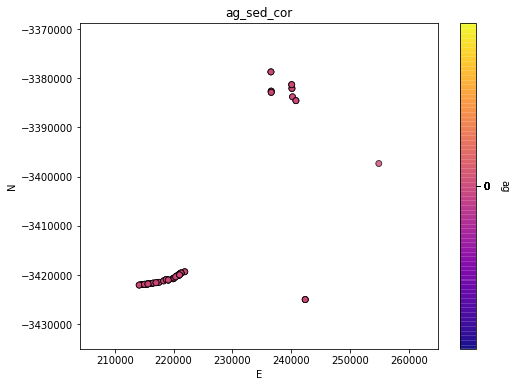

A variavel al não possui valores.
A variavel bi não possui valores.


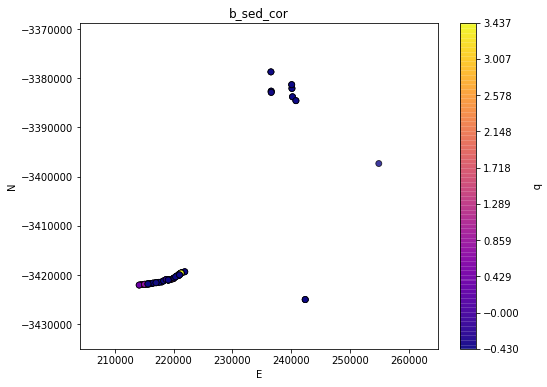

A variavel cao não possui valores.


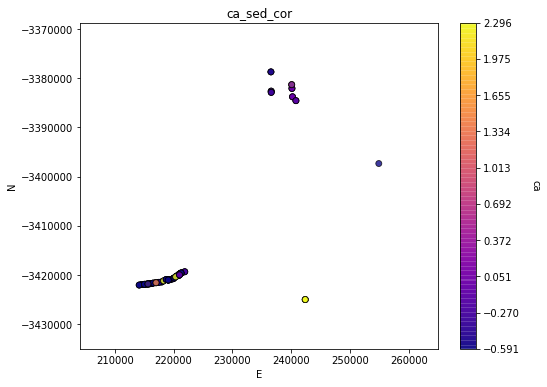

A variavel cd não possui valores.
A variavel ce não possui valores.


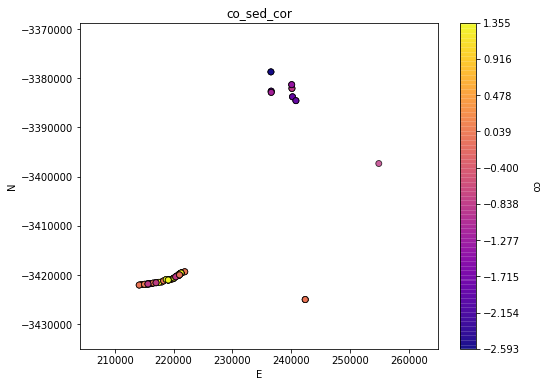

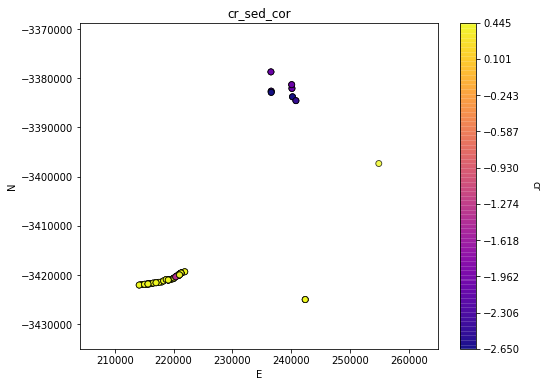

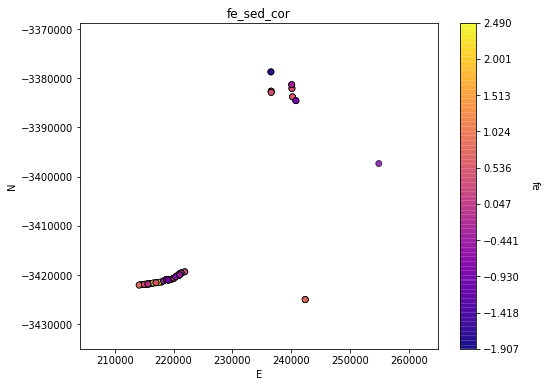

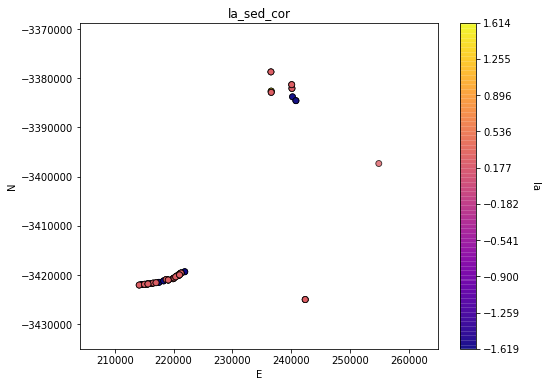

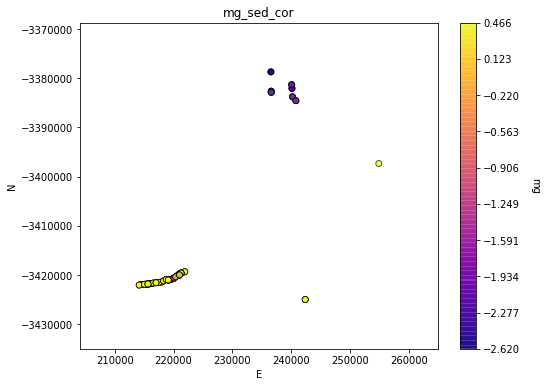

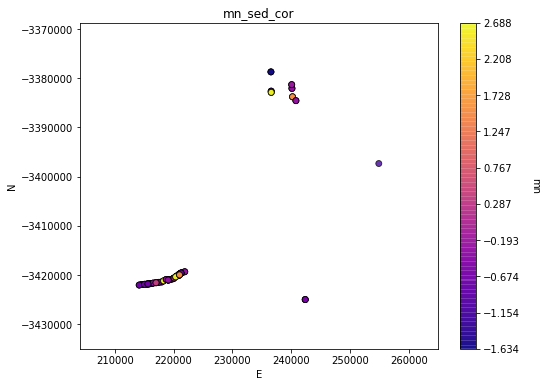

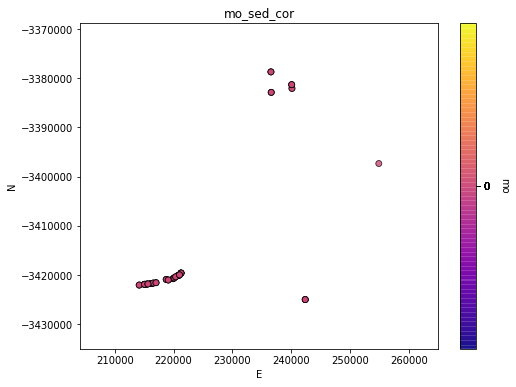

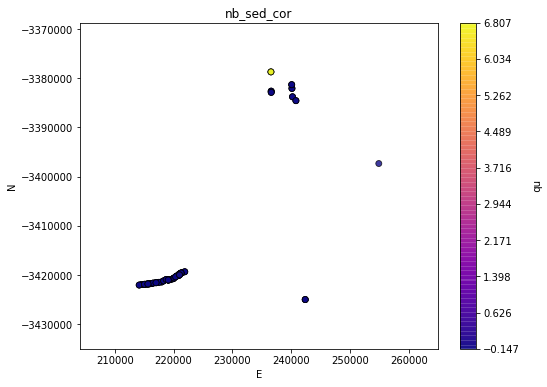

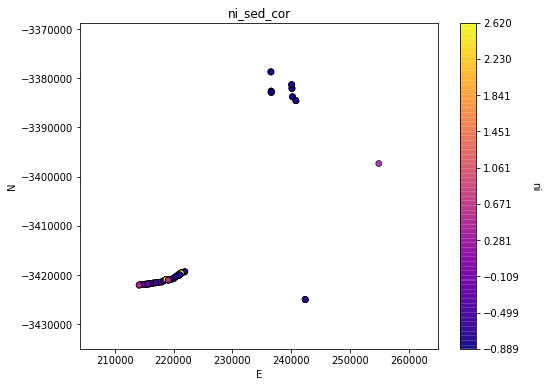

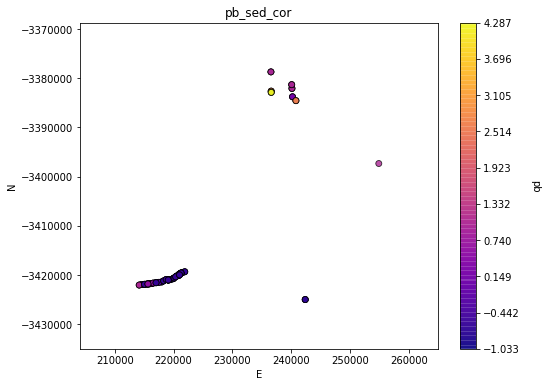

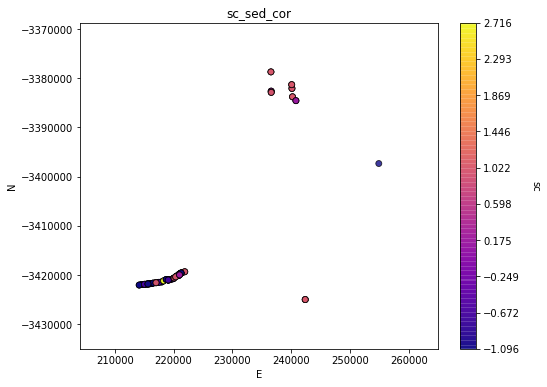

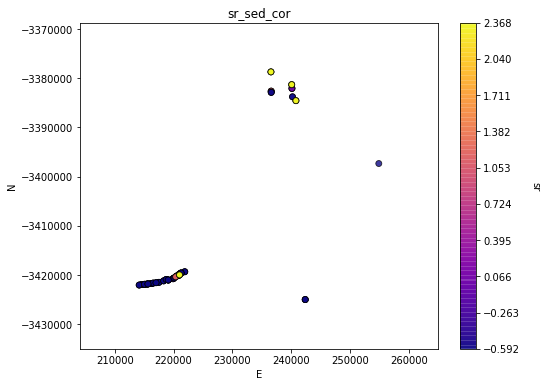

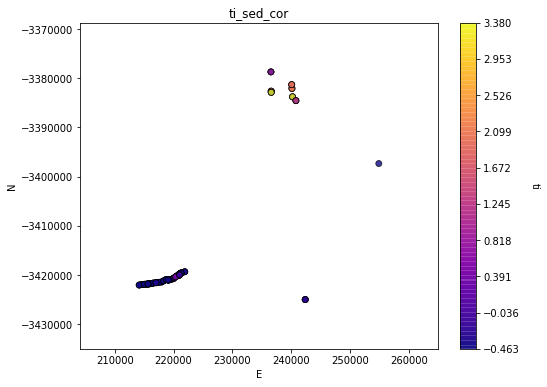

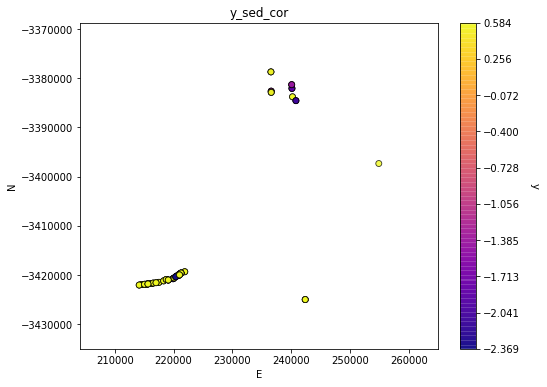

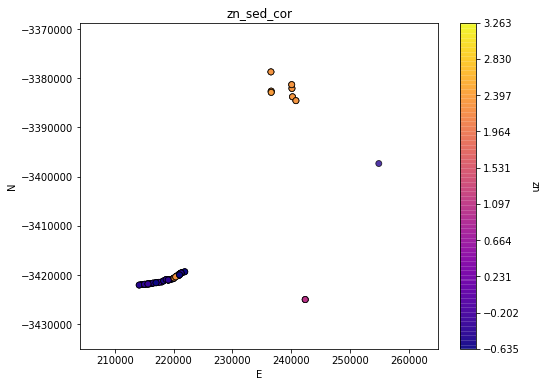

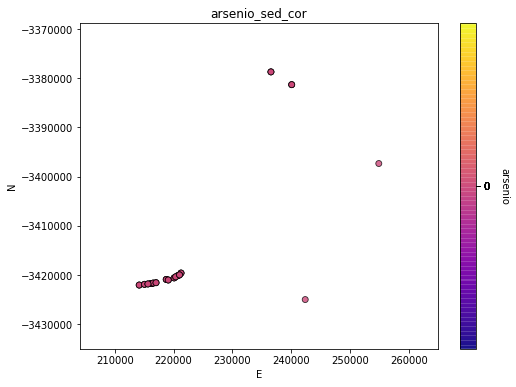

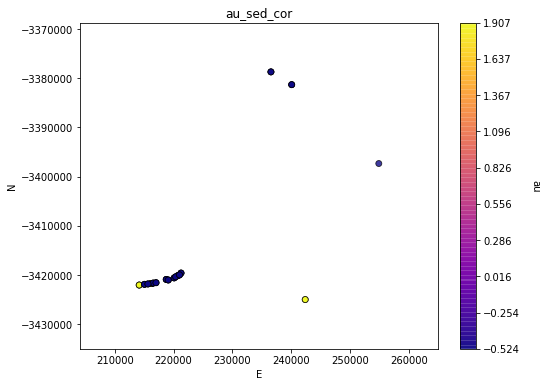

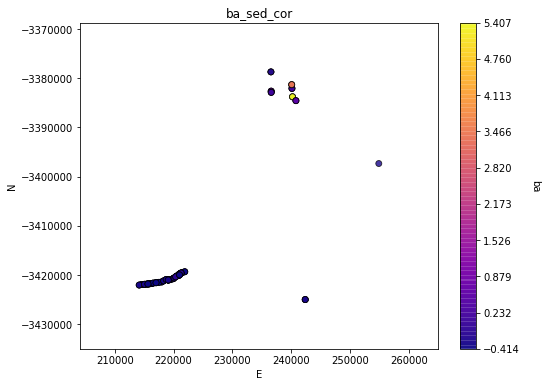

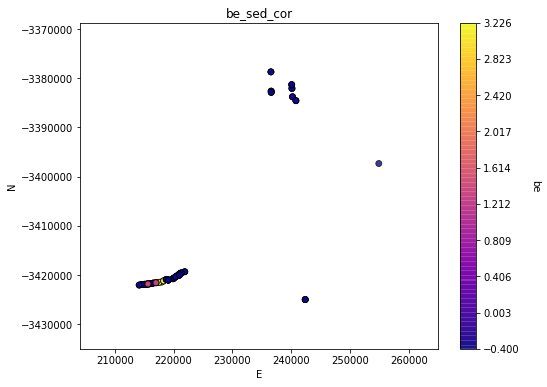

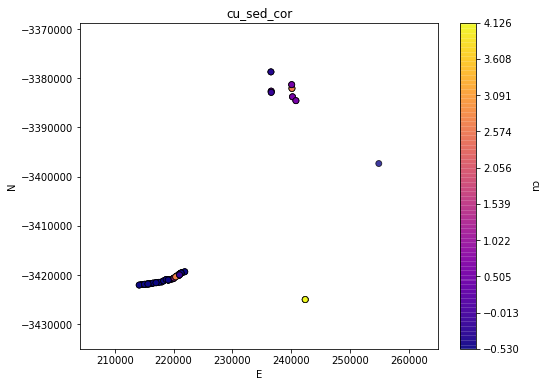

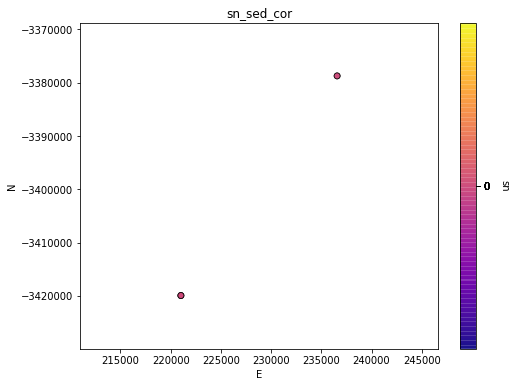

A variavel w não possui valores.


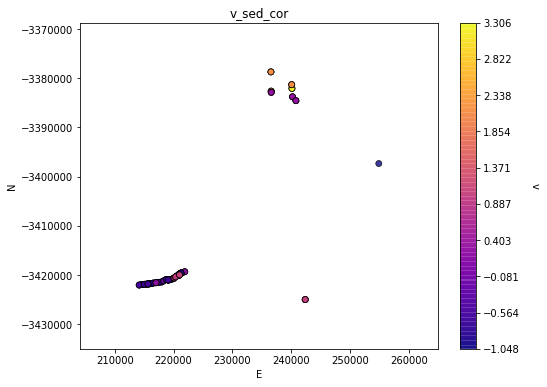

In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  if len(sbd['POINT_X']) != 0:
    xmin = min(sbd['POINT_X']) - 10000 ; xmax = max(sbd['POINT_X']) + 10000
    ymin = min(sbd['POINT_Y']) - 10000 ; ymax = max(sbd['POINT_Y']) + 10000
    vmin = min(sbd[v]) ; vmax = max(sbd[v])
    cmap = plt.cm.plasma
    GSLIB.locmap(df=sbd, xcol='POINT_X', ycol='POINT_Y', vcol=v,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
              title=f'{v}_rocha', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_rocha')
  else:
    print(f'A variavel {v} não possui valores.')

#Distribuição pontual dos teores anômalos

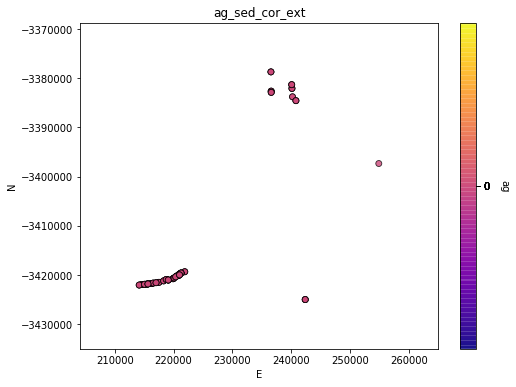

A variavel al não possui valores anômalos.
A variavel bi não possui valores anômalos.


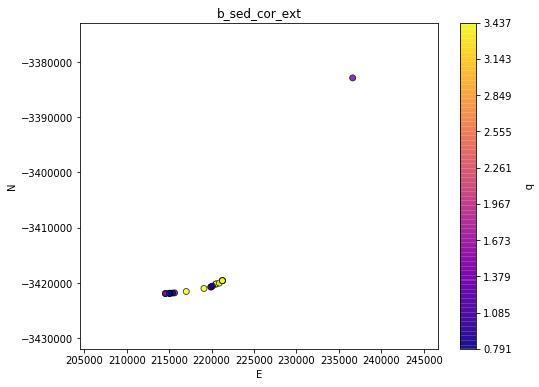

A variavel cao não possui valores anômalos.


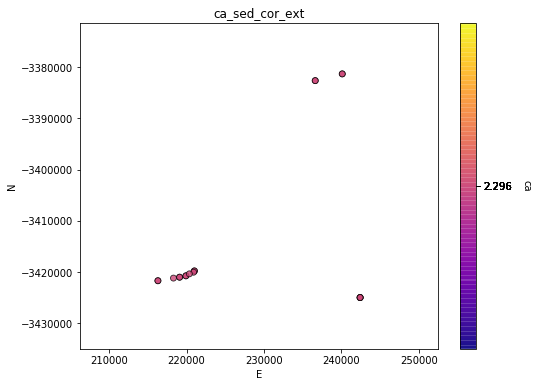

A variavel cd não possui valores anômalos.
A variavel ce não possui valores anômalos.
A variavel co não possui valores anômalos.


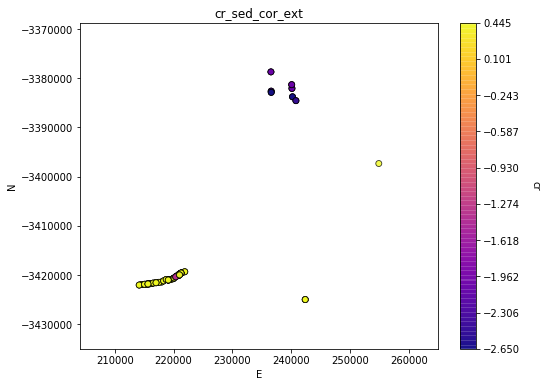

A variavel fe não possui valores anômalos.


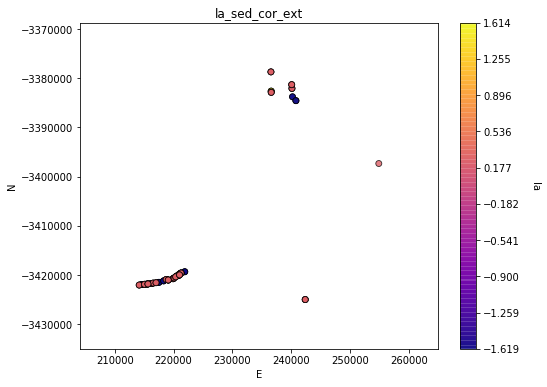

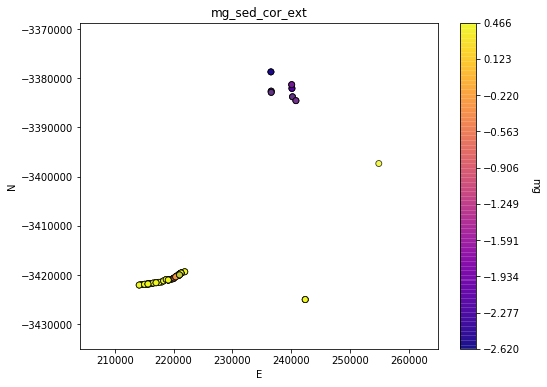

A variavel mn não possui valores anômalos.


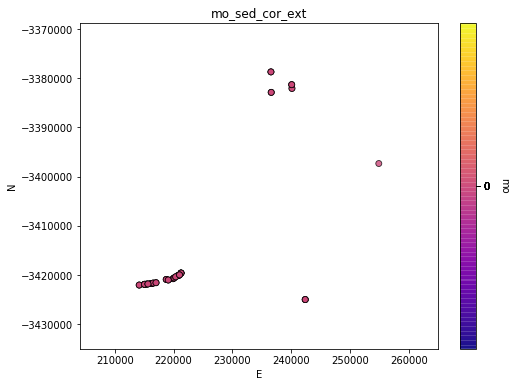

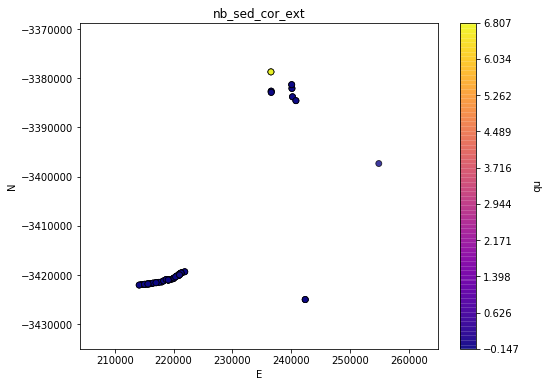

A variavel ni não possui valores anômalos.
A variavel pb não possui valores anômalos.
A variavel sc não possui valores anômalos.
A variavel sr não possui valores anômalos.


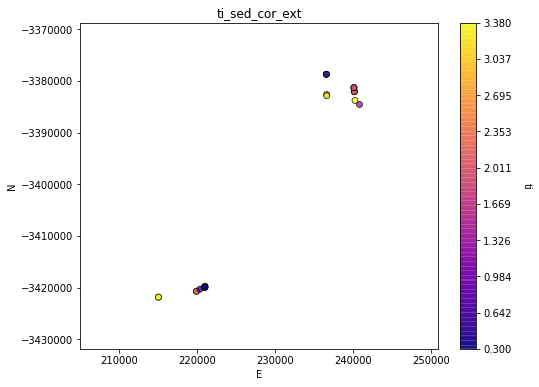

A variavel y não possui valores anômalos.


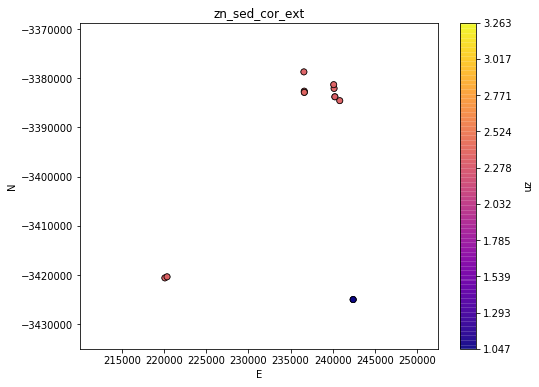

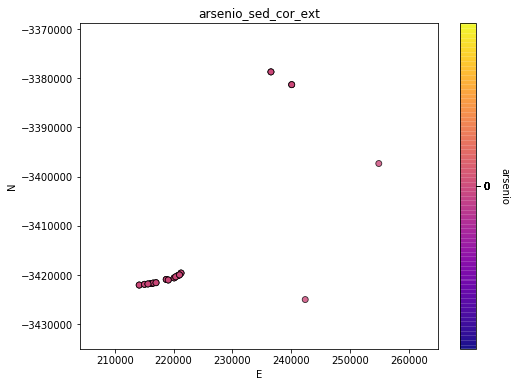

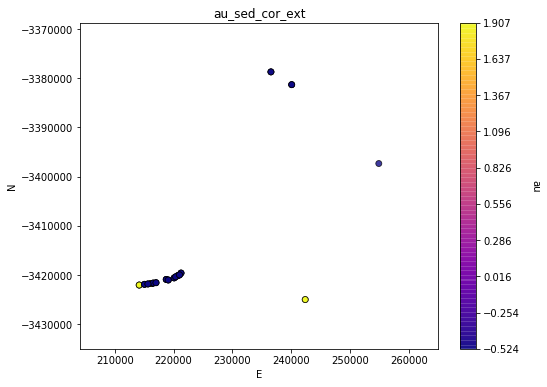

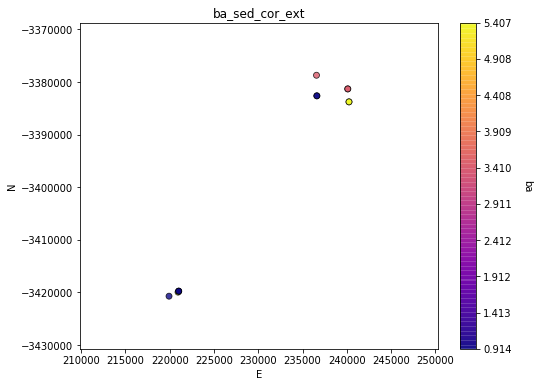

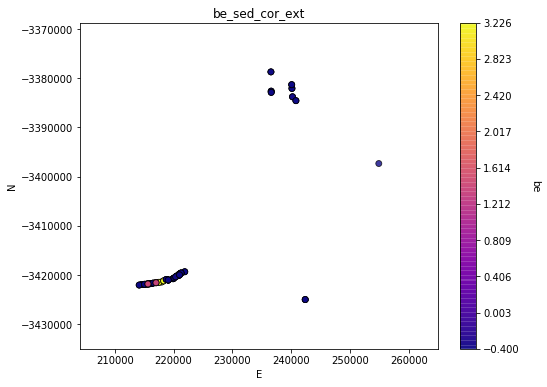

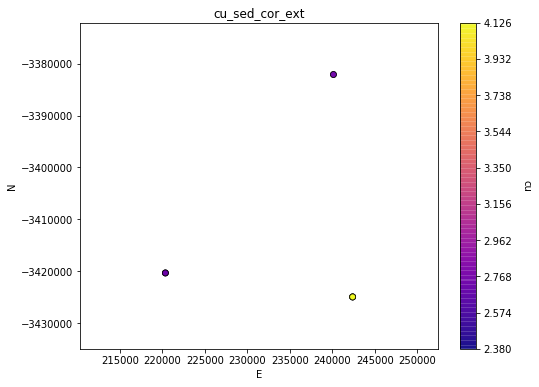

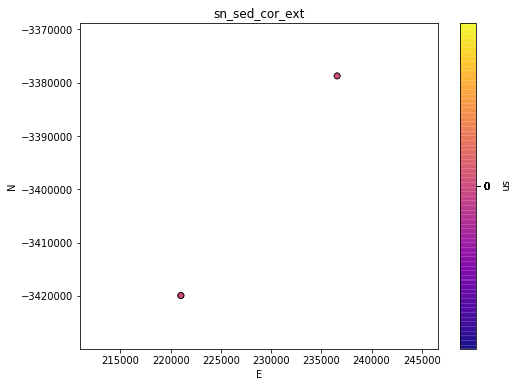

A variavel w não possui valores anômalos.
A variavel v não possui valores anômalos.


In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  ext = sbd[(sbd[v] >= suma.loc['início extremos superiores',v])
   | (sbd[v] <= suma.loc['início extremos inferiores',v])]
  if len(ext['POINT_X']) != 0:
    xmin = min(ext['POINT_X']) - 10000 ; xmax = max(ext['POINT_X']) + 10000
    ymin = min(ext['POINT_Y']) - 10000 ; ymax = max(ext['POINT_Y']) + 10000
    vmin = min(ext[v]) ; vmax = max(ext[v])
    cmap = plt.cm.plasma
    GSLIB.locmap(df=ext, xcol='POINT_X', ycol='POINT_Y', vcol=v,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, vmin=vmin, vmax=vmax,
              title=f'{v}_rocha_ext', xlabel='E', ylabel='N', vlabel=v, cmap=cmap, fig_name=f'{v}_rocha_ext')
  else:
    print(f'A variavel {v} não possui valores anômalos.')


#Distribuição espacial das variáveis

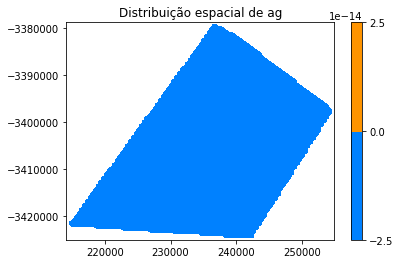

A variável al não possui dados
A variável bi não possui dados


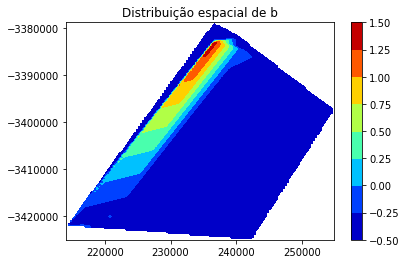

A variável cao não possui dados


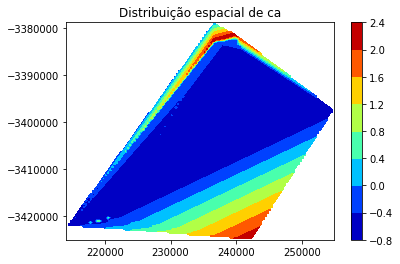

A variável cd não possui dados
A variável ce não possui dados


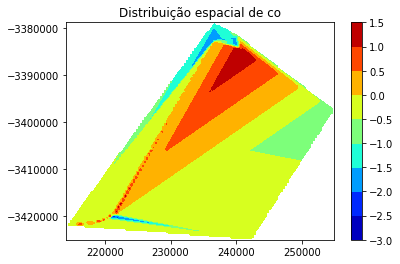

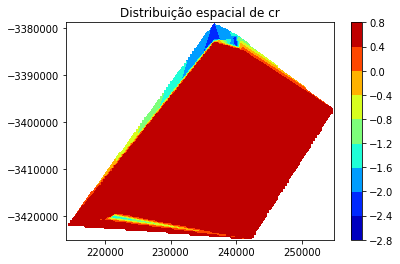

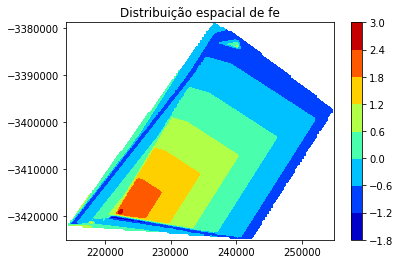

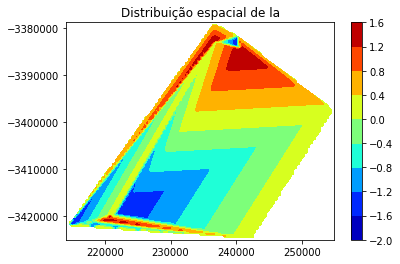

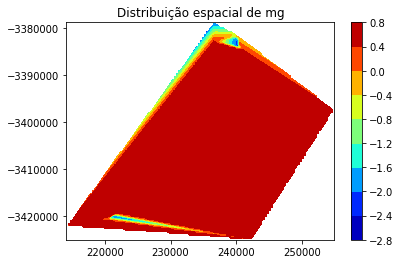

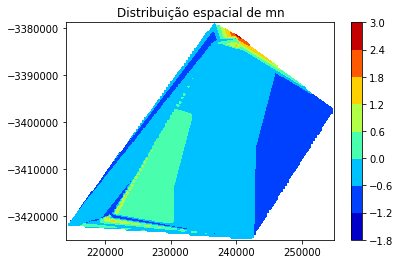

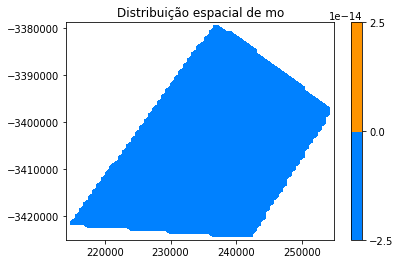

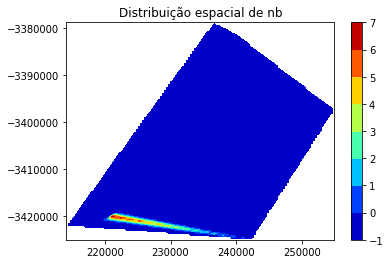

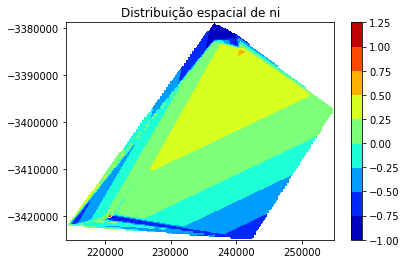

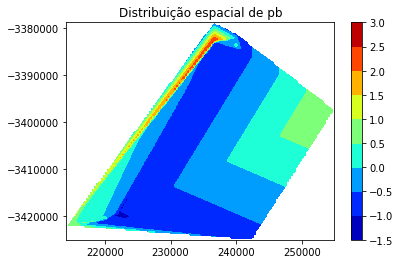

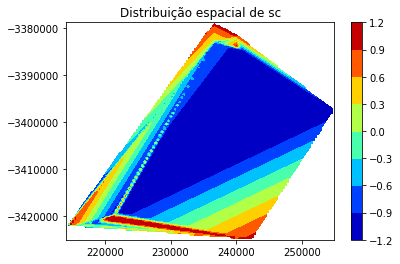

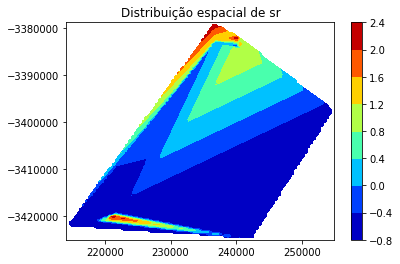

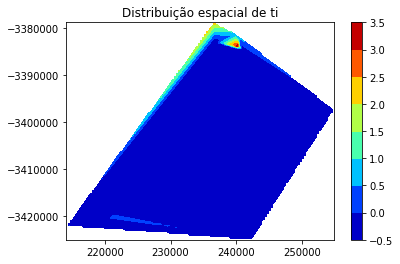

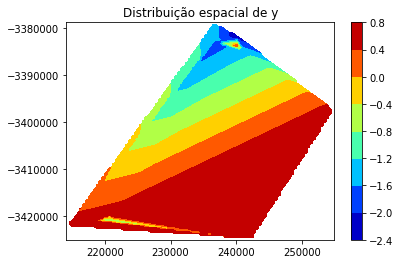

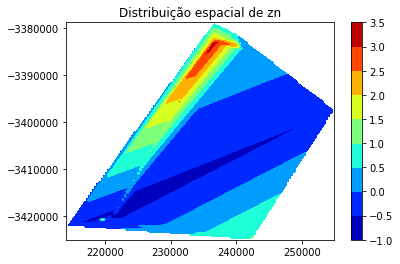

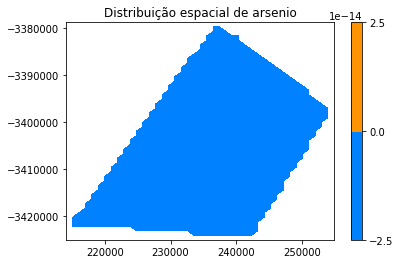

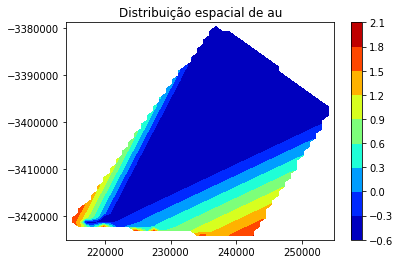

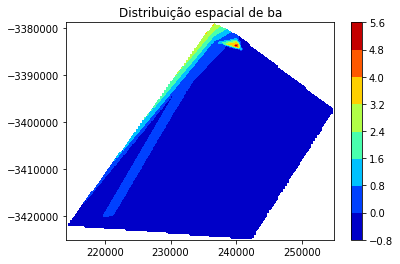

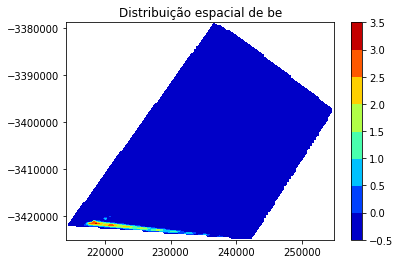

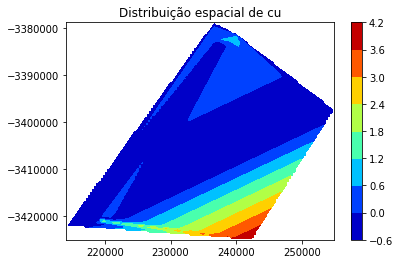

QhullError: ignored

In [ ]:
for c, v in enumerate (variaveis):
  sbd = bd.loc[:,['POINT_X', 'POINT_Y', v]].dropna()
  if len(sbd['POINT_X']) != 0: 
    em = np.sqrt(((xmax - xmin)*(ymax - ymin)))/len(sbd[v])
    x = np.array(sbd.POINT_X.values)
    y = np.array(sbd.POINT_Y.values)
    z = np.array(sbd[v].values)
    resol = float(em)
    xinum = (max(x) - min(x)) / resol
    yinum = (max(y) - min(y)) / resol
    xi = np.linspace(min(x), max(x), xinum)
    yi = np.linspace(min(y), max(y), yinum)
    xi, yi = np.meshgrid(xi, yi)
    zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='linear')
    #Zi =  np.ma.masked_array(zi, zi < 1)
    cmap = plt.get_cmap('jet')
    c = plt.contourf(xi, yi, zi, cmap=cmap)
    plt.colorbar(c)
    plt.title(f'Distribuição espacial de {v}')
    plt.show()
  else:
    print(f'A variável {v} não possui dados')